In [27]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [28]:
def synthetic_data(w,b,num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)

In [29]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([1.2075, 0.2536]) 
label: tensor([5.7700])


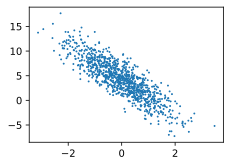

In [30]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [31]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indeices = list(range(num_examples))
    #这些样本是随机读取的，没有特定的顺序
    random.shuffle(indeices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indeices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.8593, -0.5580],
        [ 0.8151,  0.9571],
        [ 0.2513, -1.0106],
        [-1.4990, -0.1099],
        [-0.4644, -0.6789],
        [-1.1564, -1.5425],
        [ 1.3257,  0.6725],
        [ 0.1864,  0.2510],
        [ 1.0846,  0.8252],
        [-0.3677, -0.1369]]) 
 tensor([[7.8133],
        [2.5857],
        [8.1332],
        [1.5898],
        [5.5905],
        [7.1323],
        [4.5635],
        [3.7247],
        [3.5616],
        [3.9411]])


定义初始化模型参数

In [32]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

定义模型

In [33]:
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [34]:
def square_loss(y_hat,y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [35]:
def sgd(params ,lr ,batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [36]:
lr = 0.03
num_epochs = 3
net = linreg
loss = square_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1},loss {float(train_l.mean()):f}')

epoch 1,loss 0.036373
epoch 2,loss 0.000130
epoch 3,loss 0.000053
